# Demo: Simple Linear Regression for Automobile mpg

In this demo, you will see how to:
* Load data from a text file using the `pandas` package
* Create a scatter plot of data
* Handle missing data
* Fit a simple linear model
* Plot the linear fit with the test data
* Use a nonlinear transformation for an improved fit

## Loading the Data

The python [`pandas`](http://pandas.pydata.org/) library is a powerful package for data analysis.
In this course, we will use a small portion of its features -- just reading and writing data from files
After reading the data, we will convert it to [`numpy`](http://www.numpy.org/) for all numerical processing.

We begin by loading the packages.

In [1]:
import pandas as pd
import numpy as np

The data for this demo comes from a survey of cars to determine the relation of mpg to engine characteristics.  The data can be found in the UCI library:
https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Attempt 1:  Loading the Data under Default `read_csv` Settings

The `pandas` library has very good methods for loading data from ASCII tables. In this case, we want to read the data in the file:
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

Since the file is a CSV (comma-separated-values) file, we will try to use the `read_csv` command under its default settings.  This will create a pandas *dataframe* called `df`. We can then print the first six lines of the dataframe using the `head` command:

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
df.head(6)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
5,14.0 8 454.0 220.0 4354. 9...


You can see that there are three problems:
* All the data appeared in one column.  That is, the columns were not "delimited" correctly
* The first line got misinterpreted as a header
* The columns are missing their header names

### Attempt 2: Loading the Data Correctly

The problems above are common.
Often it takes a few tries to load the data correctly.
That is why it is useful to examine the first few lines of the dataframe before proceeding.
After some googling, you can find that the `read_csv` command requires some additional options.
First, if you want to use the column names for this dataset, you need to supply them manually.
For this, we create an array of strings using the description given on the UCI website:

In [3]:
names = ['mpg', 'cylinders','displacement', 'horsepower', 
         'weight', 'acceleration', 'model year', 'origin', 'car name']

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


Now you can see that the data was correclty loaded. 
There are multiple columns with the specified column names.
Each row corresponds to a particular car, and the values in each row appear to be reasonable.

## Accessing the Data
The `shape` field of the dataframe stores the number of samples and the number of attributes per sample (i.e., # of rows and columns). 

In [5]:
df.shape

(398, 9)

The `index` field tells how the samples are indexed.  In this case, they are simply indexed as 0,1,..., 398.

In [6]:
df.index

RangeIndex(start=0, stop=398, step=1)

The `values` field is a 2D array containing the values of the attributes for each sample.  Notice that the data are *heterogeneous*:  Some entries are integers, some are floating point values, and some are strings.

In [7]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

 The `columns` field stores the names of the attributes.

In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

Note that the output is not a python list, but a `pandas`-specific data structure called an `Index`.  To convert this to a list, use the `tolist()` method:

In [9]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

There are various ways to extract the data from a dataframe.  For example, the command below extracts the data from one column, and returns what is called a pandas `Series`:

In [10]:
df2 = df['mpg']
df2.head(6)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
Name: mpg, dtype: float64

You can also select a subset of columns and store the result as another dataframe.
Note the use of the double brackets `[[ ... ]]` below.

In [11]:
df2 = df[['cylinders','horsepower']]
df2.head(6)

,cylinders,horsepower
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0
5,8,198.0


You can select a subset of rows as follows:

In [12]:
df.loc[1:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst


And you can select a subset of rows and columns as follows:

In [13]:
df.loc[[1,2,4],'displacement':'weight']

,displacement,horsepower,weight
1,350.0,165.0,3693.0
2,318.0,150.0,3436.0
4,302.0,140.0,3449.0


## Visualizing the Data
We load the `matplotlib` module to plot the data.  This module has excellent plotting routines that are similar to those in MATLAB.

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

First, let's extract some data columns and convert to `numpy` arrays:

In [15]:
xstr = 'displacement'
x = np.array(df[xstr])
y = np.array(df['mpg'])

Now we can create a scatter plot:

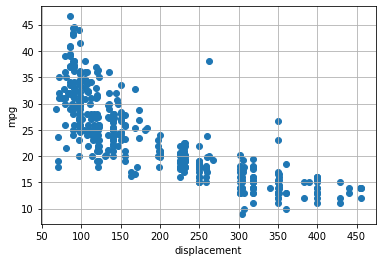

In [16]:
plt.scatter(x,y) # or plt.plot(x,y,'o')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

## Manipulating Numpy arrays

Once the data is converted to a numpy array, we can perform useful  calculations.  For example, we can compute and print the sample mean as follows:

In [17]:
xm = np.mean(x)
ym = np.mean(y)
print('Mean {0:s} = {1:5.1f}, mean mpg= {2:5.1f}'.format(xstr, xm, ym))

Mean displacement = 193.4, mean mpg=  23.5


Suppose that we want to compute the fraction of cars with mpg > 25.  This is easy to do:

In [18]:
np.mean(y > 25)

0.3969849246231156

Note that `(y > 25)` above creates a binary vector.  We can store this as a variable and use it to compute the sample mean of the displacement `x` for the cars that have mpg > 25:

In [19]:
I = (y>25)
np.mean(x*I)/np.mean(I)

110.08227848101266

Above, `*` performs an elementwise multiply of two vectors. We could have also done this mean computation using [boolean indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html):

In [20]:
np.mean(x[I])

110.08227848101266

## Missing Data and NaN Values

Now, let's try a different field, horsepower:

In [21]:
xstr = 'horsepower'
x = np.array(df[xstr])
y = np.array(df['mpg'])
np.mean(x)

nan

Above, `nan` means *not a number*.  The reason for this result is that the orginal file had missing entries and the `load_csv` function used `nan`  for these missing entries.  This is very common occurence with datafiles.  To remove all rows with missing data, we can use the `dropna` method:

In [22]:
df1 = df[['mpg','horsepower']]
df2 = df1.dropna()
df2.shape

(392, 2)

Note that the number of samples went from 396 to 392, meaning that 4 rows were dropped.  We can now compute the mean using the reduced dataframe.

In [23]:
x = np.array(df2['horsepower'])
y = np.array(df2['mpg'])
np.mean(x)

104.46938775510205

And, we can plot the reduced data.

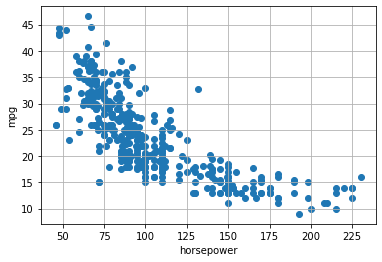

In [24]:
plt.scatter(x,y)
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

## Computing and Plotting a Linear Fit
We can now fit a linear model to the data, i.e., $\hat{y} = \beta_0 + \beta_1 x$.
From class, the LS fit is given by:
$$\beta_1 = s_{yx}/s_{xx}, \quad \beta_0 = \bar{y} - \beta_1\bar{x},$$
where $\bar{x}$ and $\bar{y}$ are the sample means and $s_{yx}$ and $s_{xx}$ are the cross- and auto-covariances.

In [25]:
xm = np.mean(x)
ym = np.mean(y)
sxx = np.mean((x-xm)**2)
syy = np.mean((y-ym)**2)
syx = np.mean((y-ym)*(x-xm))
beta1 = syx/sxx
beta0 = ym - beta1*xm
Rsq = syx**2/sxx/syy

print("xm       ={0:7.2f},         ym ={1:7.2f}".format(xm,ym))
print("sqrt(sxx)={0:7.2f},  sqrt(syy) ={1:7.2f}".format(np.sqrt(sxx),np.sqrt(syy)))
print("beta0    ={0:7.2f},      beta1 ={1:7.2f}".format(beta0,beta1))
print("Rsq = {0:7.2f}".format(Rsq))

xm       = 104.47,         ym =  23.45
sqrt(sxx)=  38.44,  sqrt(syy) =   7.80
beta0    =  39.94,      beta1 =  -0.16
Rsq =    0.61


We can create a plot of the regression line on top of the scatter plot.  The vector `xplt` are the x-coordinates of the two endpoints of the line.  They are chosen so that the line fits nicely in the plot.

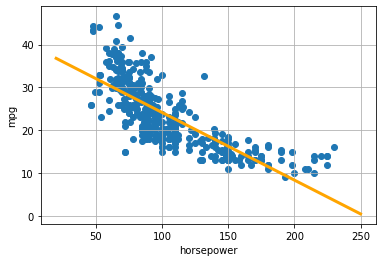

In [26]:
# Points on the regression line
xplt = np.array([20,250])          
yplt = beta1*xplt + beta0

plt.scatter(x,y)                    # Plot the data points
plt.plot(xplt,yplt,'-',linewidth=3,color='orange')  # Plot the regression line
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

The residual-sum-of-squares is RSS=$\sum_i (y_i-\hat{y}_i)^2$

In [27]:
yhat=beta0+beta1*x
RSS = np.sum((y-yhat)**2)
print("RSS = {0:7.2f}".format(RSS))

RSS = 9385.92


Let us see whether this is the same as the analytically derived minimal nRSS

In [28]:
n=y.shape[0]
rhoxy=syx/np.sqrt(sxx)/np.sqrt(syy)
RSSmin=n*(1-rhoxy*rhoxy)*syy
print("RSSmin = {0:7.2f}".format(RSSmin))

RSSmin = 9385.92


## Nonlinear Transformation

We see that the linear regression captures the general trend of the relation between `y=mpg` and `x=horsepower`.
However, the trend does not appear very linear.
Instead, it shows an inverse-type relation.
So, a natural idea is to *nonlinearly transform* the data.
In particular:
* Construct the transformed data `z=1/y` 
* Fit `z` vs. `x` with a linear model:  $\hat{z }=\beta_0 + \beta_1 x$.
* Invert the nonlinearity to predict `y`:  $\hat{y} = 1/\hat{z}=1/(\beta_0 + \beta_1x)$.

Below, we compute `z` and then generate a scatter plot of `z` vs. `x`.  Note that `z` has units of gallons per mile (1/mpg).

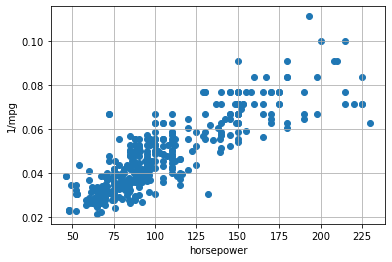

In [29]:
z = 1/y
plt.scatter(x,z)
plt.xlabel(xstr)
plt.ylabel('1/mpg')
plt.grid(True)

The scatter plot shows a linear relationship between `z` (1/mpg) and `x` (horsepower). Next, we fit the linear model
$z \approx \beta_0 + \beta_1 x$.  

In [30]:
# Use linear regression to fit `z` vs. `x`
xm = np.mean(x)
zm = np.mean(z)
sxz = np.mean((z-zm)*(x-xm))
sxx = np.mean((x-xm)**2)
szz = np.mean((z-zm)**2)
beta1_inv = sxz/sxx
beta0_inv = zm - beta1_inv*xm
Rsq = sxz**2/sxx/szz
print("Rsq = {0:7.2f}".format(Rsq))

Rsq =    0.73


Note the higher value of $R^2$.  We then superimpose the regression line on the scatter plot.  

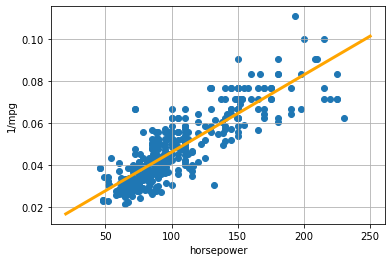

In [31]:
z = 1/y
xplt_inv = np.linspace(20,250,100)
zplt_inv = beta1_inv*xplt_inv + beta0_inv
plt.scatter(x,z)
plt.plot(xplt_inv,zplt_inv,'-',linewidth=3,color='orange')
plt.xlabel(xstr)
plt.ylabel('1/mpg')
plt.grid(True)

Finally, we compute the estimate in the original domain:  $\hat{y}=1/\hat{z}$.  We plot the data, original linear fit and the linear fit with inversion.

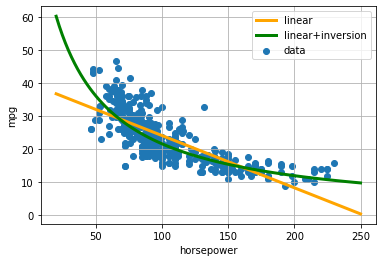

In [32]:
yplt_inv = 1/zplt_inv 
plt.scatter(x,y,label='data')
plt.plot(xplt,yplt,'-',linewidth=3,color='orange',label='linear')
plt.plot(xplt_inv,yplt_inv,'-',linewidth=3,color='green',label='linear+inversion')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)
plt.legend()

We conclude by comparing the RSS using the linear fit to that using the linear fit+inversion.  We get a smaller error using the nonlinear transformation.

In [33]:
zhat_inv = beta0_inv + beta1_inv*x
yhat_inv = 1/zhat_inv
RSS_inv = np.sum((yhat_inv-y)**2)
print("RSS = {0:7.2f} (linear)".format(RSS))
print("RSS = {0:7.2f} (linear+inversion)".format(RSS_inv))

RSS = 9385.92 (linear)
RSS = 8100.67 (linear+inversion)
